In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, t
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot

# Autocorrelation

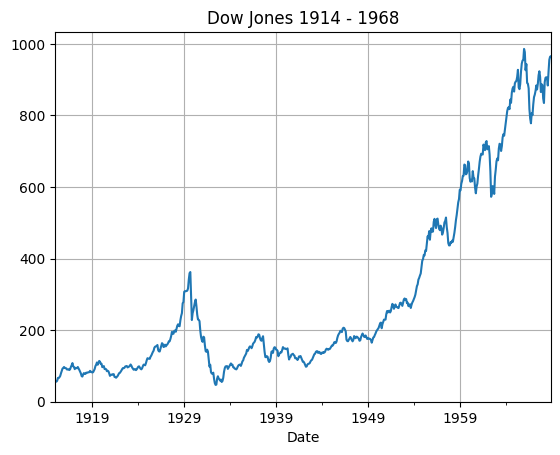

In [109]:
df = sns.load_dataset("dowjones")
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.set_index('Date', inplace=True)
df.plot(grid=True, legend=False)
start_year = df.index[0].year
end_year = df.index[-1].year
plt.title(f"Dow Jones {start_year} - {end_year}")
plt.show()

In [115]:
df['Monthly Return (%)'] = df.Price.pct_change()
df['Monthly Return ABS'] = abs(df.Price.pct_change() * df.Price)
df

,Price,Monthly Return (%),Monthly Return ABS
Date,,,
1914-12-01,55.00,NaN,NaN
1915-01-01,56.55,0.028182,1.593682
1915-02-01,56.00,-0.009726,0.544651
1915-03-01,58.30,0.041071,2.394464
1915-04-01,66.45,0.139794,9.289322
...,...,...,...
1968-08-01,883.72,-0.023859,21.084646
1968-09-01,922.80,0.044222,40.808202
1968-10-01,955.47,0.035403,33.826620


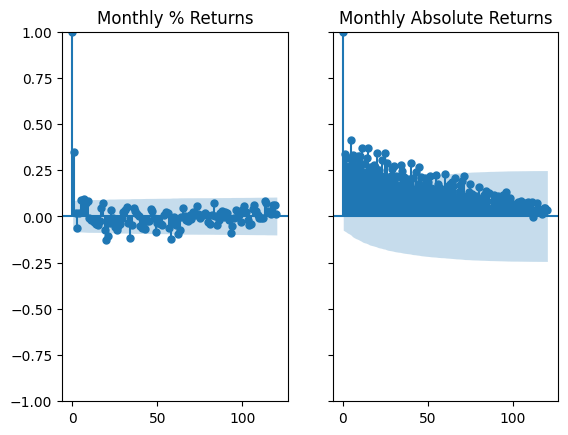

In [123]:
fig, ax = plt.subplots(1,2, sharey=True)
plot_acf(df['Monthly Return (%)'].dropna(), lags=120, ax=ax[0], title="Monthly % Returns")
plot_acf(df['Monthly Return ABS'].dropna(), lags=120, ax=ax[1], title="Monthly Absolute Returns")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))

# T-Distributions

In [27]:
# set the means and standard deviations for the normal and t-distributions
mu_norm = 0
sigma_norm = 5
df_t = 2
mu_t = 0
sigma_t = 1 / np.sqrt(df_t)

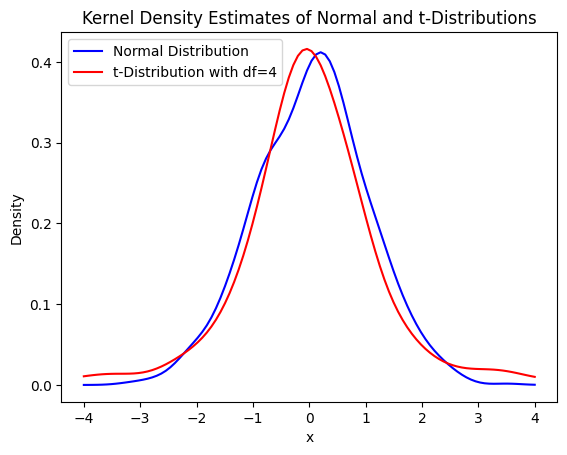

In [28]:
# generate 1000 samples from each distribution
samples_norm = norm.rvs(size=1000)
samples_t = t.rvs(df=df_t, loc=mu_t, scale=sigma_t, size=1000)

# calculate the kernel density estimates
kde_norm = stats.gaussian_kde(samples_norm)
kde_t = stats.gaussian_kde(samples_t)

# evaluate the kernel density estimates at the desired x-values
x = np.linspace(-4, 4, 100)
y_norm = kde_norm(x)
y_t = kde_t(x)

# plot the kernel density estimates
plt.plot(x, y_norm, 'b-', label='Normal Distribution')
plt.plot(x, y_t, 'r-', label='t-Distribution with df=4')

# set labels and title
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Kernel Density Estimates of Normal and t-Distributions')
plt.legend()
plt.show()

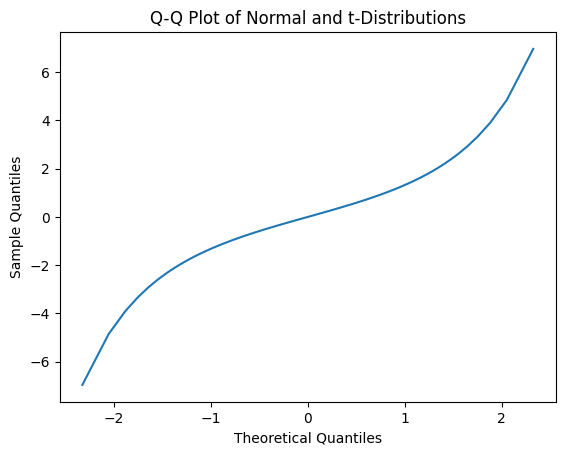

In [29]:
# create the quantiles for the normal distribution
q_norm = norm.ppf(np.arange(0, 1.01, 0.01))

# calculate the quantiles for the t-distribution
q_t = t.ppf(np.arange(0, 1.01, 0.01), df=df_t)

# plot the qq-plot
plt.plot(q_norm, q_t)

# set labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Normal and t-Distributions')
plt.show()